In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


#### Abot The Dataset
This dataset contains an enormous number of anonymized patient-related information including pre-conditions. 
The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features,
1 means "yes" and 0 means "no". values as 97 and 99 are missing data.

    usmer         : Indicates whether the patient treated medical units of the first, second or third level.
    medical unit  : type of institution of the National Health System that provided the care.
    sex           : female(1) or male(2)
    patient type  : hospitalized or not hospitalized.
    age           : of the patient.
    classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
                    degrees. 4 or higher means that the patient is not a carrier of covid or that the test is                           inconclusive.
    
    pneumonia     : whether the patient already have air sacs inflammation or not.
    pregnancy     : whether the patient is pregnant or not.
    diabetes      : whether the patient has diabetes or not.
    copd          : Indicates whether the patient has Chronic obstructive pulmonary disease or not.
    asthma        : whether the patient has asthma or not.
    inmsupr       : whether the patient is immunosuppressed or not.
    hypertension  : whether the patient has hypertension or not.
    cardiovascular: whether the patient has heart or blood vessels related disease.
    renal chronic : whether the patient has chronic renal disease or not.
    other disease : whether the patient has other disease or not.
    obesity       : whether the patient is obese or not.
    tobacco       : whether the patient is a tobacco user.
    medical unit  : type of institution of the National Health System that provided the care.
    intubed       : whether the patient was connected to the ventilator.
    icu           : Indicates whether the patient had been admitted to an Intensive Care Unit.
    death         : indicates whether the patient died or recovered.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
df.isna().sum().sum()

0

In [6]:
for i in df.columns:
    print(i,"--\t",len(df[i].unique()))



USMER --	 2
MEDICAL_UNIT --	 13
SEX --	 2
PATIENT_TYPE --	 2
DATE_DIED --	 401
INTUBED --	 4
PNEUMONIA --	 3
AGE --	 121
PREGNANT --	 4
DIABETES --	 3
COPD --	 3
ASTHMA --	 3
INMSUPR --	 3
HIPERTENSION --	 3
OTHER_DISEASE --	 3
CARDIOVASCULAR --	 3
OBESITY --	 3
RENAL_CHRONIC --	 3
TOBACCO --	 3
CLASIFFICATION_FINAL --	 7
ICU --	 4


#### We will check the value_counts() of the columns having more than two unique values

In [7]:
for i in ['INTUBED','PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE',
          'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO','ICU']:
    print(df[i].value_counts())
    print("*"*25)

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
*************************
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
*************************
97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64
*************************
2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64
*************************
2     1030510
1       15062
98       3003
Name: COPD, dtype: int64
*************************
2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64
*************************
2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64
*************************
2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64
*************************
2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64
*************************
2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64
*************************
2     88572

# DATA PREPROCESSING

#### All these values 97,98,99 are actually nan values. So we will create a fuction to replace these values with np.nan

In [8]:
def process_columns(x):
    if x in [97,98,99]:
        return np.nan
    else:
        return x

In [9]:
for i in ['INTUBED','PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE',
          'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO','ICU']:
    df[i] = df[i].apply(process_columns)

### Also for all these columns we replace 2 with 0 which means 'No' and 1 will be same which means yes.

In [10]:
for i in ['INTUBED','PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE',
          'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO','ICU']:
    df[i] = [0 if x==2 else x for x in df[i]]

In [11]:
# Percentage of null values present
df.isna().sum()/len(df)*100

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
DATE_DIED                0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
AGE                      0.000000
PREGNANT                50.283957
DIABETES                 0.318337
COPD                     0.286389
ASTHMA                   0.284100
INMSUPR                  0.324631
HIPERTENSION             0.296021
OTHER_DISEASE            0.481129
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
TOBACCO                  0.307083
CLASIFFICATION_FINAL     0.000000
ICU                     81.637651
dtype: float64

#### Most of the columns have less than 5000 missing values except 'INTUBED','PREGNANT','ICU'.Drop these 3 columns and drop the missing values of other columns.
#### We are dropping nan values instead of filling because ours is a huge dataset.

In [12]:
df.drop(['INTUBED','PREGNANT','ICU'],axis=1,inplace=True)

In [13]:
df.dropna(inplace=True)
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1.0,65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
1,2,1,2,1,03/06/2020,1.0,72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5
2,2,1,2,2,09/06/2020,0.0,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2,1,1,1,12/06/2020,0.0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,2,1,2,1,21/06/2020,0.0,68,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1048571,1,13,2,2,9999-99-99,0.0,51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
1048572,2,13,2,1,9999-99-99,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1048573,2,13,2,1,9999-99-99,0.0,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [14]:
df.isna().sum().sum()

0

#### In 'DATE_DIED' column, we have 9999-99-99 values which represents the patients who have not died. Feature these into new DEATH column having 1 and 0, where 1 represents dead and 0 represents Alive.
#### DEATH column will be our target column.

In [15]:
df['DEATH'] = [0 if x=='9999-99-99' else 1 for x in df.DATE_DIED]
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,03/05/2020,1.0,65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
1,2,1,2,1,03/06/2020,1.0,72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,1
2,2,1,2,2,09/06/2020,0.0,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,2,1,1,1,12/06/2020,0.0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1
4,2,1,2,1,21/06/2020,0.0,68,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1


# VISUALIZATIONS

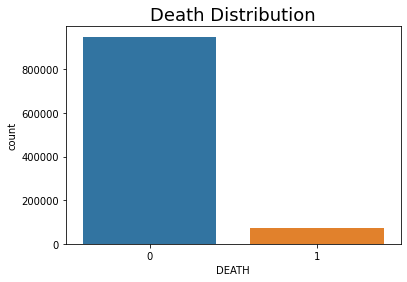

In [16]:
plt.title("Death Distribution", fontsize=18)
sns.countplot(x=df['DEATH'])

    >> Count of people who died are very low

Text(0.5, 1.0, 'AGE-DEATH Distribution')

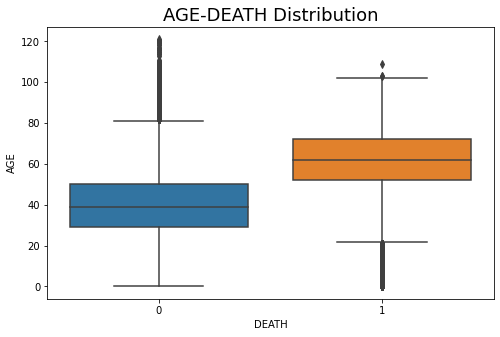

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['DEATH'],y=df['AGE'],data=df)
plt.title("AGE-DEATH Distribution", fontsize=18)

    >> The average age distribution for dead people are around 60.
    >> The average age distribution of alive people are around 40
    >> This summarises young people survived than the older people

Text(0.5, 1.0, 'AGE-DEATH-SEX')

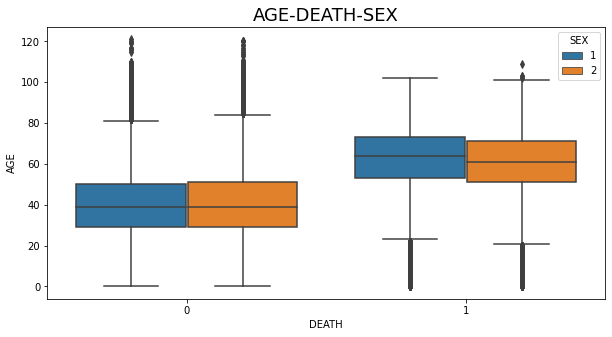

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['DEATH'],y=df['AGE'],data=df,hue='SEX')
plt.title("AGE-DEATH-SEX", fontsize=18)

    >> Irrespective of the gender, the AGE-DEATH distribution follows the normal trend.

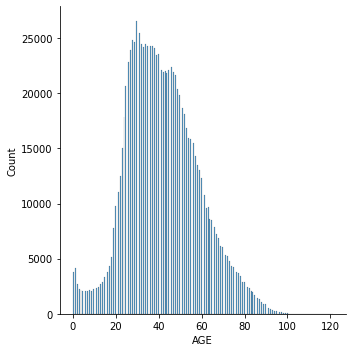

In [19]:
sns.displot(df['AGE'])

    >> Age between 20 and 40 constitutes more in the dataset.
    >> But they are the ones most survived also.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


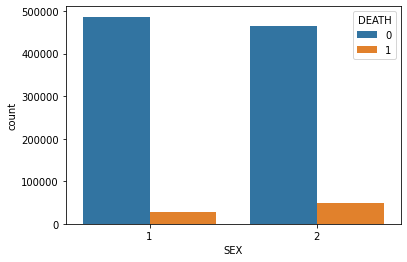

In [20]:
sns.countplot(df.SEX,hue=df.DEATH)

    >> Both male and females have almost same death and survive distribution
    >> But males are slightly more likely to die due to covid-19

In [21]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

### Preprocessing DATE_DIED for Visulazation

In [22]:
data = df.copy()

In [23]:
data['DATE_DIED']=[np.nan if x=='9999-99-99' else x for x in data.DATE_DIED]

In [24]:
data['DATE_DIED']=pd.to_datetime(data.DATE_DIED)

In [25]:
data['month'] = data['DATE_DIED'].dt.month

In [26]:
dict_month = {1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'}

In [27]:
data['month'] = data['month'].map(dict_month)

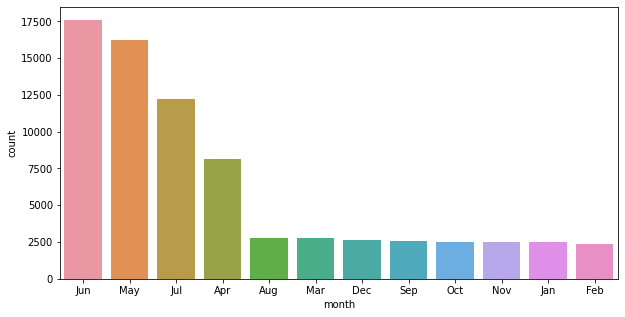

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['month'],order = data['month'].value_counts().index)

# FEATURE SELECTION

#### We have to remove DATE_DIED column, because we already created a feature column called DEATH. Rest of the features can be selected using correlation or Mutual Info Regression

In [29]:
df.drop('DATE_DIED',axis=1,inplace=True)

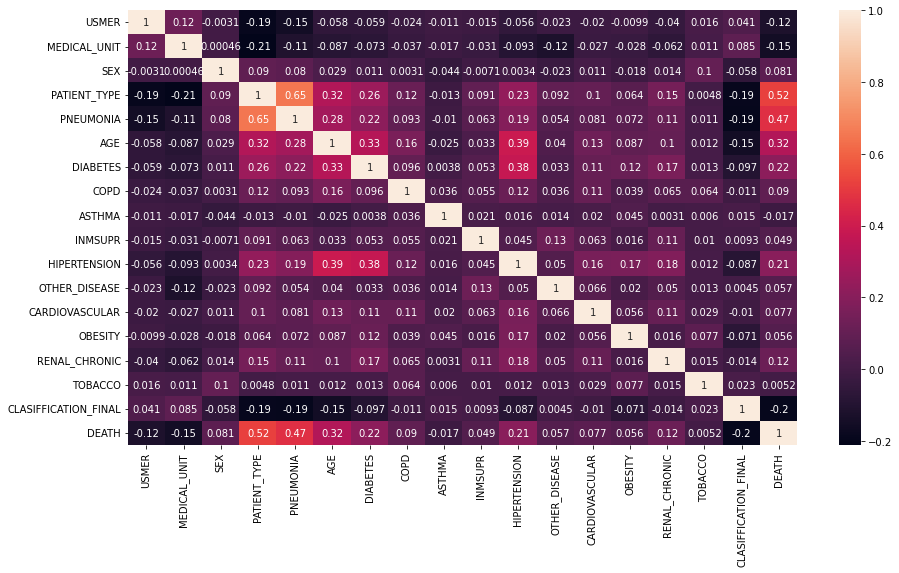

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

 While comparing with DEATH feature, correlation  of SEX, COPD, ASTHMA, INMSUPR, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, TOBACCO are very low (almost zero). So we will drop all these columns.

In [31]:
df.drop(["SEX","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","TOBACCO"],axis=1,inplace=True)
df

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1.0,65,0.0,1.0,0.0,3,1
1,2,1,1,1.0,72,0.0,1.0,1.0,5,1
2,2,1,2,0.0,55,1.0,0.0,0.0,3,1
3,2,1,1,0.0,53,0.0,0.0,0.0,7,1
4,2,1,1,0.0,68,1.0,1.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,1,0.0,40,0.0,0.0,0.0,7,0
1048571,1,13,2,0.0,51,0.0,1.0,0.0,7,0
1048572,2,13,1,0.0,55,0.0,0.0,0.0,7,0
1048573,2,13,1,0.0,28,0.0,0.0,0.0,7,0


### Encoding categorical features which are not binary

In [32]:
MEDICAL_Unit = pd.get_dummies(df['MEDICAL_UNIT'],drop_first=True)
CLASSIFICATION_final = pd.get_dummies(df['CLASIFFICATION_FINAL'],drop_first=True)

In [33]:
df = pd.concat([df,MEDICAL_Unit,CLASSIFICATION_final],axis=1)

In [34]:
df.drop(['MEDICAL_UNIT','CLASIFFICATION_FINAL'],axis=1,inplace=True)

 # MACHINE LEARNING

In [35]:
X = df.drop('DEATH',axis=1).values
y = df['DEATH'].values

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling the data

In [38]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### RANDOM FOREST CLASSIFICATION

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    285154
           1       0.58      0.47      0.52     22392

    accuracy                           0.94    307546
   macro avg       0.77      0.72      0.74    307546
weighted avg       0.93      0.94      0.93    307546



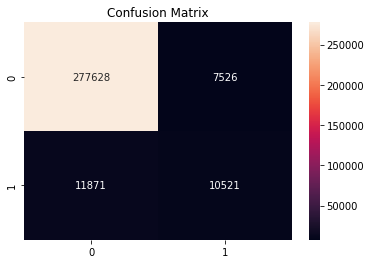

In [42]:
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt=".0f")

### Inference
    >> We have got an high accuracy score of 94%.
    >> Our model performed well on survived category predictions.
    >> But the f1-score and recall is very low for those who are 'dead'.
    >> This is due to an imbalanced data set. Our dataset is an highly imbalanced dataset.

### DEALING WITH IMBALANCED DATASET
    >> Here we will under sample our data set, since our dataset is a huge dataset.(more than 10 lakh rows)

In [43]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled,y_resampled = rus.fit_resample(X,y)

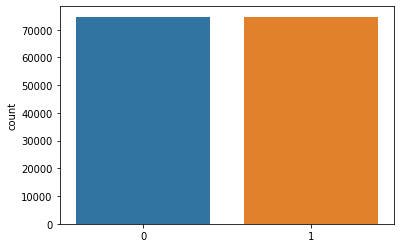

In [44]:
sns.countplot(x=y_resampled)

### Train Test Split and Scaling after Under Sampling

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=42)

In [54]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Cross Validation
To select best algorithm for our model

In [47]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
kn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [48]:
# KNeighbours
cross_val_score(kn,X_train,y_train)

array([0.90650096, 0.90487572, 0.90578394, 0.9042065 , 0.90769157])

In [50]:
# Decision Tree
cross_val_score(tree,X_train,y_train)

array([0.89216061, 0.88785851, 0.89220841, 0.88905354, 0.88938286])

In [51]:
# Random Forest
cross_val_score(rf,X_train,y_train)

array([0.90186424, 0.89899618, 0.90023901, 0.89866157, 0.90190736])

In [52]:
# Logistic Regression
cross_val_score(lg,X_train,y_train)

array([0.90750478, 0.90358509, 0.90807839, 0.90635755, 0.91070319])

### Since most of the algorithms have almost same cross validation score we will go with Random Forest, since several of its paramters can be tuned to get a better model.

In [64]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=2,min_samples_leaf=2,max_features='auto',n_jobs=-1,random_state=0)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     22361
           1       0.89      0.95      0.92     22468

    accuracy                           0.91     44829
   macro avg       0.91      0.91      0.91     44829
weighted avg       0.91      0.91      0.91     44829



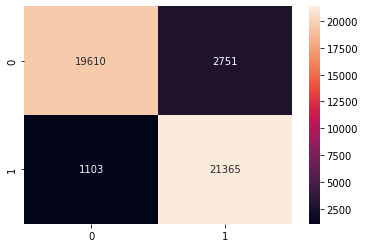

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f')

# Conclusion
    >> The model has an high accuracy of 91%
    >> Also it has higher F1-score and recall.
    >> Hypertuning this model is highly time consuming since this is a large dataset.
    >> But with the given paramters our model has performed well and predicted both Death and Alive cases effectively.